In [3]:
import np as np

import Ramsey_ExperimentV3
from tqdm import tqdm
import random

import estimator
import numpy as np

In [12]:
fitted_data = []
T = 1 * np.pi
uni_delay = np.linspace(0, T, 20)
shots = 5000

n = 1
delay = [1]
fisher_delay = [0.4439410861020235, 1.784695781691183]

decay_fit = []

repetitions = 100
# W =]
Decay = np.arange(0.001, 3.1, 0.25)
# np.delete(W, 0)
W = [1]
J = {}
J_list = [random.gauss(1, 0) for _ in range(n - 1)]
for rep in tqdm(range(repetitions), desc="Repetition"):
    rep_decay_fit = []
    for decay in Decay:
        # Create experiments
        batch_x_det, batch_y_det, batch_x_cross, batch_y_cross = Ramsey_ExperimentV3.ramsey_local(
            n, shots, delay, [decay], W, J
        )
        batch_det, batch_cross = Ramsey_ExperimentV3.ramsey_local_X(n, shots, fisher_delay, [decay], W, J)
        batch_det_uni_x, batch_cross_uni_x = Ramsey_ExperimentV3.ramsey_local_X(n, shots, uni_delay, [decay], W, J)

        batch_x_det_uni, batch_y_det_uni, batch_x_cross_uni, batch_y_cross_uni = Ramsey_ExperimentV3.ramsey_local(
            n, shots, uni_delay, [decay], W, J
        )

        # Append batches and decay to decay fit list
        rep_decay_fit.append((
            decay,
            (batch_x_det, batch_y_det, batch_x_cross, batch_y_cross),
            (batch_det, batch_cross),
            (batch_x_det_uni, batch_y_det_uni, batch_x_cross_uni, batch_y_cross_uni),
            (batch_det_uni_x, batch_cross_uni_x)
        ))

    decay_fit.append(rep_decay_fit)

Repetition:   0%|          | 0/100 [11:47<?, ?it/s]


KeyboardInterrupt: 

In [36]:

from importlib import reload
reload(estimator)

<module 'estimator' from 'C:\\Projects\\Crosstalk\\estimator.py'>

In [37]:
# #load from pickle
# with open('decay_fit.pkl', 'rb') as f:
#     decay_fit = pkl.load(f)
for rep, rep_batches in enumerate(decay_fit):
    rep_fits = []
    print(f"Repetition {rep} / {repetitions}")
    for decay, (batch_x_det, batch_y_det, batch_x_cross, batch_y_cross), (batch_det, batch_cross), (batch_x_det_uni, batch_y_det_uni, batch_x_cross_uni, batch_y_cross_uni),(batch_det_uni_x, batch_cross_uni_x)  in rep_batches:
        Decay_local, W_local, J_local = estimator.one_by_one_fit(batch_x_det, batch_y_det, batch_x_cross, batch_y_cross)
        Decay_fisher, W_fisher, J_fisher = estimator.one_by_one_X(batch_det, batch_cross)
        Decay_uni, W_uni, J_uni = estimator.one_by_one_fit(batch_x_det_uni, batch_y_det_uni, batch_x_cross_uni, batch_y_cross_uni)
        Decay_uni_X, W_uni_X, J_uni_X = estimator.one_by_one_X(batch_det_uni_x, batch_cross_uni_x)

        rep_fits.append((
            decay,
            (Decay_local, W_local, J_local),
            (Decay_fisher, W_fisher, J_fisher),
            (Decay_uni, W_uni, J_uni),
            (Decay_uni_X, W_uni_X, J_uni_X)
        ))

    fitted_data.append(rep_fits)

C:\Projects\Crosstalk\estimator.py:36: OptimizeWarning: Covariance of the parameters could not be estimated
  params, params_covariance, *c = curve_fit(model_func, t_points, z_points, p0=initial_guess, bounds=bounds)
C:\Projects\Crosstalk\estimator.py:66: OptimizeWarning: Covariance of the parameters could not be estimated
  params, params_covariance, *c = curve_fit(model_func, t_points, z_points, p0=initial_guess, bounds=bounds)


Repetition 0 / 1000
Repetition 1 / 1000
Repetition 2 / 1000
Repetition 3 / 1000
Repetition 4 / 1000
Repetition 5 / 1000
Repetition 6 / 1000
Repetition 7 / 1000
Repetition 8 / 1000
Repetition 9 / 1000
Repetition 10 / 1000
Repetition 11 / 1000
Repetition 12 / 1000
Repetition 13 / 1000
Repetition 14 / 1000
Repetition 15 / 1000
Repetition 16 / 1000
Repetition 17 / 1000
Repetition 18 / 1000
Repetition 19 / 1000
Repetition 20 / 1000
Repetition 21 / 1000
Repetition 22 / 1000
Repetition 23 / 1000
Repetition 24 / 1000
Repetition 25 / 1000
Repetition 26 / 1000
Repetition 27 / 1000
Repetition 28 / 1000
Repetition 29 / 1000
Repetition 30 / 1000
Repetition 31 / 1000
Repetition 32 / 1000
Repetition 33 / 1000
Repetition 34 / 1000
Repetition 35 / 1000
Repetition 36 / 1000
Repetition 37 / 1000
Repetition 38 / 1000
Repetition 39 / 1000
Repetition 40 / 1000
Repetition 41 / 1000
Repetition 42 / 1000
Repetition 43 / 1000
Repetition 44 / 1000
Repetition 45 / 1000
Repetition 46 / 1000
Repetition 47 / 1000
Re

In [38]:
from importlib import reload
errors_fisher = []
errors_local = []
errors_uniform = []
errors_uniform_X = []
decay_test = []
reload(estimator)
for rep, rep_fits in enumerate(fitted_data):
    rep_error_fisher = []
    rep_error_local = []
    rep_error_uniform = []
    rep_error_uniform_X = []

    for decay, (Decay_local, W_local, J_local), (Decay_fisher, W_fisher, J_fisher), (Decay_uni, W_uni, J_uni), (Decay_uni_X, W_uni_X, J_uni_X) in rep_fits:
        fisher_errors = estimator.percent_error(
            np.concatenate([W, [decay], J_list]),
            np.concatenate([W_fisher, Decay_fisher, J_fisher])
        )
        local_errors = estimator.percent_error(
            np.concatenate([W, [decay], J_list]),
            np.concatenate([W_local, Decay_local, J_local])
        )

        uniform_errors = estimator.percent_error(
            np.concatenate([W, [decay], J_list]),
            np.concatenate([W_uni, Decay_uni, J_uni])
        )

        uniform_errors_X = estimator.percent_error(
            np.concatenate([W, [decay], J_list]),
            np.concatenate([W_uni_X, Decay_uni_X, J_uni_X])
        )

        rep_error_fisher.append(fisher_errors)
        rep_error_local.append(local_errors)
        rep_error_uniform.append(uniform_errors)
        rep_error_uniform_X.append(uniform_errors_X)

    errors_fisher.append(rep_error_fisher)
    errors_local.append(rep_error_local)
    errors_uniform.append(rep_error_uniform)
    errors_uniform_X.append(rep_error_uniform_X)

print(np.sqrt(np.mean(decay_test)))

nan


C:\Users\user\PycharmProjects\ML_Crosstalk\venv\Lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\user\PycharmProjects\ML_Crosstalk\venv\Lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [39]:
k = 10

errors_fisher_reshaped = np.array(errors_fisher).transpose()
errors_local_reshaped = np.array(errors_local).transpose()
errors_uniform_reshaped = np.array(errors_uniform).transpose()
errors_fisher_reshaped_X = np.array(errors_uniform_X).transpose()

# errors_local_reshaped = list(map(list, zip(*errors_local)))
# errors_uniform_reshaped = list(map(list, zip(*uniform_local)))
# errors_fisher_reshaped_G = list(map(list, zip(*uniform_local_G)))

errors_fisher_reshaped_a = errors_fisher_reshaped[1]
errors_local_reshaped_a = errors_local_reshaped[1]
errors_uniform_reshaped_a = errors_uniform_reshaped[1]
errors_fisher_reshaped_X_a = errors_fisher_reshaped_X[1]

errors_fisher_reshaped_w = errors_fisher_reshaped[0]
errors_local_reshaped_w = errors_local_reshaped[0]
errors_uniform_reshaped_w = errors_uniform_reshaped[0]
errors_fisher_reshaped_X_w = errors_fisher_reshaped_X[0]


# errors_fisher_median_a, errors_fisher_std_a = np.sqrt(np.mean(errors_fisher_reshaped_a, axis=1)), np.std(errors_fisher_reshaped_a, axis=1)
#
#
errors_fisher_median_a, errors_fisher_std_a = estimator.mean_of_medians(errors_fisher_reshaped_a, k)
errors_local_median_a, errors_local_std_a = estimator.mean_of_medians(errors_local_reshaped_a, k)
errors_uniform_median_a, errors_uniform_std_a = estimator.mean_of_medians(errors_uniform_reshaped_a, k)
errors_uniform_X_median_a, errors_fisher_std_X_a = estimator.mean_of_medians(errors_fisher_reshaped_X_a, k)

errors_fisher_median_w, errors_fisher_std_w = estimator.mean_of_medians(errors_fisher_reshaped_w, k)
errors_local_median_w, errors_local_std_w = estimator.mean_of_medians(errors_local_reshaped_w, k)
errors_uniform_median_w, errors_uniform_std_w = estimator.mean_of_medians(errors_uniform_reshaped_w, k)
errors_uniform_X_median_w, errors_fisher_std_X_w = estimator.mean_of_medians(errors_fisher_reshaped_X_w, k)

# errors_uniform_median_G, errors_uniform_std_G = estimator.mean_of_medians(errors_fisher_reshaped_G, k)
print()

C:\Users\user\AppData\Local\Temp\ipykernel_28092\2644166111.py:33: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


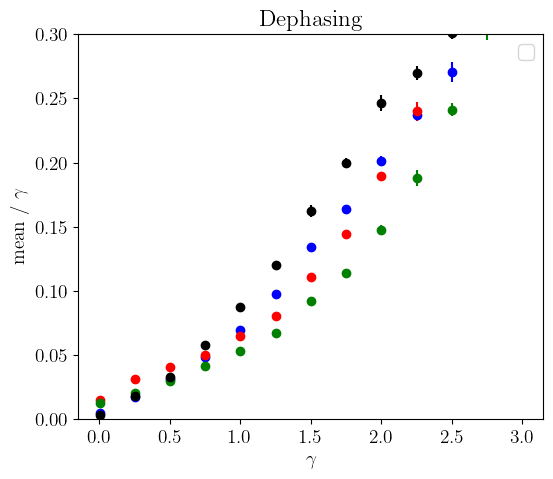

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))  # Adjust the figure size to make the plot longer
plt.rcParams['text.usetex'] = True
font = {'family': 'normal',
        'weight': 'bold',
        'size': 14}

plt.rc('font', **font)

plt.errorbar(Decay, np.array(errors_uniform_median_a), yerr= np.array(errors_uniform_std_a),
             fmt='o', color='blue')
plt.errorbar(Decay, np.array(errors_fisher_median_a), yerr= np.array(errors_fisher_std_a),
             fmt='o', color='red')
plt.errorbar(Decay, np.array(errors_local_median_a), yerr= np.array(errors_local_std_a), fmt='o',
             color='green')

plt.errorbar(Decay, np.array(errors_uniform_X_median_a), yerr= np.array(errors_fisher_std_X_a),
             fmt='o', color='black')




plt.title("Dephasing")
# plt.title(f'Shots={Decay} ')
plt.xlabel('$\gamma$')
plt.ylabel('mean / $\gamma$')
plt.grid()
# plt.yscale('log')
# plt.xscale('log')
plt.ylim([0, 0.3])
plt.grid()
plt.legend()

C:\Users\user\AppData\Local\Temp\ipykernel_28092\3305529383.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


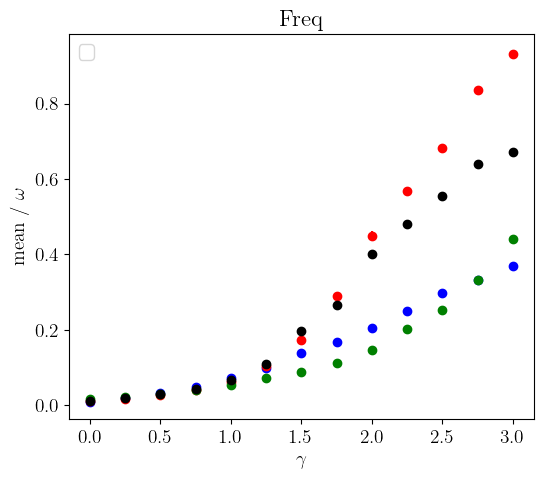

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))  # Adjust the figure size to make the plot longer
plt.rcParams['text.usetex'] = True
font = {'family': 'normal',
        'weight': 'bold',
        'size': 14}

plt.rc('font', **font)

plt.errorbar(Decay,  np.array(errors_uniform_median_w), yerr= np.array(errors_uniform_std_w),
             fmt='o', color='blue')
plt.errorbar(Decay,  np.array(errors_fisher_median_w), yerr= np.array(errors_fisher_std_w),
             fmt='o', color='red')
plt.errorbar(Decay,  np.array(errors_local_median_w), yerr= np.array(errors_local_std_w), fmt='o',
             color='green')
plt.errorbar(Decay,  np.array(errors_uniform_X_median_w), yerr= np.array(errors_fisher_std_X_w),
             fmt='o', color='black')
plt.title("Freq")

# plt.title(f'Shots={Decay} ')
plt.xlabel('$\gamma$')
plt.ylabel('mean / $\omega$')
plt.grid()
# plt.yscale('log')
# plt.xscale('log')
# plt.xlim([0, 2])
# plt.ylim([0,50])
plt.grid()

plt.legend()

Decay:  1.501
mean:  8.970778948321332
median:  7.7192234677342375


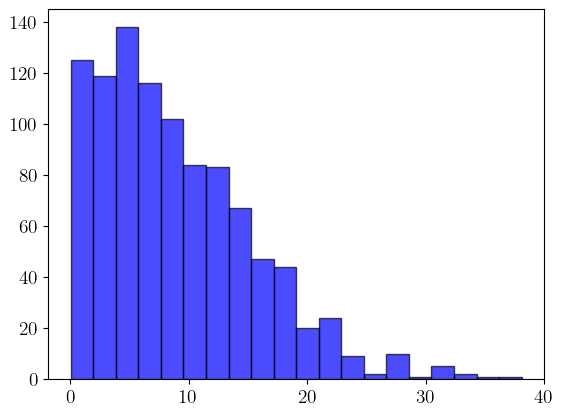

In [43]:
index = 6
X = np.array(100 * np.array(np.sqrt(errors_fisher_reshaped_a)))[index][:1000]
# print("Decay: ",Decay[index])
# print(X)
#plot histogram with 10 bins
plt.hist(X, bins=20, color='blue', edgecolor='black', alpha=0.7)
# q75, q25 = np.percentile(X, [75, 25])
# iqr = q75 - q25
print("Decay: ", Decay[index])
print("mean: ", np.mean(X))
print("median: ", np.median(X))
# print("IQR: ", iqr)
# print("std: ", np.std(X))

In [44]:
import os
import pandas as pd
user_home = os.path.expanduser("~")

results_df = pd.DataFrame({
    "shots": shots,
    "Decay": Decay,
    "errors_fisher_median_w": errors_fisher_median_w,
    "errors_fisher_std_w": errors_fisher_std_w,
    "errors_local_median_w": errors_local_median_w,
    "errors_local_std_w": errors_local_std_w,
    "errors_uniform_median_w": errors_uniform_median_w,
    "errors_uniform_std_w": errors_uniform_std_w,
    "errors_uniform_X_median_w": errors_uniform_X_median_w,
    "errors_uniform_X_std_w": errors_fisher_std_X_w,
})

# Saving to Excel
results_df.to_excel(user_home + r'\OneDrive - Bar-Ilan University - Students\Data\Crosstalk\graphs_for_paper\stability-Decay_w.xlsx',
    index=False)

results_df = pd.DataFrame({
    "shots": shots,
    "Decay": Decay,
    "errors_fisher_median_a": errors_fisher_median_a,
    "errors_fisher_std_a": errors_fisher_std_a,
    "errors_local_median_a": errors_local_median_a,
    "errors_local_std_a": errors_local_std_a,
    "errors_uniform_median_a": errors_uniform_median_a,
    "errors_uniform_std_a": errors_uniform_std_a,
    "errors_uniform_X_median_a": errors_uniform_X_median_a,
    "errors_uniform_X_std_a": errors_fisher_std_X_a,
})

# Saving to Excel
results_df.to_excel(
    user_home + r'\OneDrive - Bar-Ilan University - Students\Data\Crosstalk\graphs_for_paper\stability-Decay_a.xlsx',
    index=False)

In [ ]:
fisher_a = []
local_a = []
uniform_a = []

fisher_w = []
local_w = []
uniform_w = []

for rep, rep_fits in enumerate(fitted_data):
    # Initialize lists for this repetition
    rep_fisher_a = []
    rep_local_a = []
    rep_uniform_a = []

    rep_fisher_w = []
    rep_local_w = []
    rep_uniform_w = []

    for decay, (Decay_local, W_local, J_local), (Decay_fisher, W_fisher, J_fisher), (Decay_uni, W_uni, J_uni) in rep_fits:
        # Append decays
        rep_fisher_a.append(Decay_fisher)
        rep_local_a.append(Decay_local)
        rep_uniform_a.append(Decay_uni)

        # Append weights
        rep_fisher_w.append(W_fisher)
        rep_local_w.append(W_local)
        rep_uniform_w.append(W_uni)

    # Calculate means for this repetition
    fisher_a.append(rep_fisher_a)
    local_a.append(rep_local_a)
    uniform_a.append(rep_uniform_a)

    fisher_w.append(rep_fisher_w)
    local_w.append(rep_local_w)
    uniform_w.append(rep_uniform_w)



fisher_a = np.array(fisher_a).transpose()[0]
local_a = np.array(local_a).transpose()[0]
uniform_a = np.array(uniform_a).transpose()[0]



fisher_w= np.array(fisher_w).transpose()[0]
local_w = np.array(local_w).transpose()[0]
uniform_w = np.array(uniform_w).transpose()[0]

fisher_a_mean = [np.mean(fisher_a[i]) for i in range(len(Decay))]
fisher_a_std = [np.std(fisher_a[i]) for i in range(len(Decay))]

local_a_mean = [np.mean(local_a[i]) for i in range(len(Decay))]
local_a_std = [np.std(local_a[i])  for i in range(len(Decay))]

uniform_a_mean = [np.mean(uniform_a[i]) for i in range(len(Decay))]
uniform_a_std = [np.std(uniform_a[i])  for i in range(len(Decay))]


fisher_w_mean = [np.mean(fisher_w[i]) for i in range(len(Decay))]
fisher_w_std = [np.std(fisher_w[i])  for i in range(len(Decay))]

local_w_mean = [np.mean(local_w[i]) for i in range(len(Decay))]
local_w_std = [np.std(local_w[i])  for i in range(len(Decay))]

uniform_w_mean = [np.mean(uniform_w[i]) for i in range(len(Decay))]
uniform_w_std = [np.std(uniform_w[i]) for i in range(len(Decay))]





# print("Fisher_a: ", len(fisher_a))

In [ ]:
# plt.plot(Decay,decay_fit_t_mean,label='fit')
# plt.scatter(Decay, fisher_a_mean, label='param')
plt.plot(Decay, (np.abs(fisher_a_mean-Decay)))
plt.axline([2, -1], [2, 1], color='black', linestyle='--', label='Stability region')
# plt.errorbar(Decay, Decay/fisher_a_mean, yerr=fisher_a_std, label='param')
plt.ylim([-0.5, 0.5])
plt.xlabel('Dephasing')
plt.ylabel('Absolute difference')
plt.legend()

In [ ]:
import os
import pandas as pd
user_home = os.path.expanduser("~")

results_df = pd.DataFrame({
    "shots": shots,
    "Decay": Decay,
    "fisher_a_mean": fisher_a_mean,
    "fisher_a_std": fisher_a_std,
    "local_a_mean": local_a_mean,
    "local_a_std": local_a_std,
    "uniform_a_mean": uniform_a_mean,
    "uniform_a_std": uniform_a_std,
    "fisher_w_mean": fisher_w_mean,
    "fisher_w_std": fisher_w_std,
    "local_w_mean": local_w_mean,
    "local_w_std": local_w_std,
    "uniform_w_mean": uniform_w_mean,
    "uniform_w_std": uniform_w_std,
})

# Saving to Excel
results_df.to_excel(user_home + r'\OneDrive - Bar-Ilan University - Students\Data\Crosstalk\graphs_for_paper\Unbiased_estimator.xlsx',
    index=False)


In [ ]:
# plt.plot(Decay,omega_fit_t_mean,label='fit')
plt.plot(Decay, [1] * len(Decay))
plt.errorbar(Decay, omega_fit_t_mean, yerr=omega_fit_t_std, label='std')

In [8]:
from tqdm import tqdm
import random
import numpy as np
T = 1 * np.pi
shots = 1000
errors_fisher = []
errors_local = []
uniform_local = []
uniform_local_G = []
n = 1
delay = [1]
fisher_delay = [0.4439410861020235, 1.784695781691183]

decay_fit = []

repetitions = 100
# W =]
Decay = np.arange(0.001, 4, 0.25)
# np.delete(W, 0)
W = [1]
J = {}
J_list = [random.gauss(1, 0) for _ in range(n - 1)]

for rep in range(repetitions):
    rep_Decay_fisher = []

    rep_decay_fit = []
    for decay in tqdm(Decay, desc=f"Repetition {rep}"):
        # batch_x_det, batch_y_det, batch_x_cross, batch_y_cross = Ramsey_ExperimentV3.ramsey_local(n, shots, delay,
        #                                                                                           [decay],
        #                                                                                           W, J)

        # Decay_local, W_local, J_local = estimator.one_by_one_fit(batch_x_det, batch_y_det, batch_x_cross,
        #                                                          batch_y_cross)

        batch_det_uni_x, batch_cross_uni_x = Ramsey_ExperimentV3.ramsey_local_X(n, shots, uni_delay, [decay], W, J)

        Decay_uni_X, W_uni_X, J_fisher_uni_X = estimator.one_by_one_X(batch_det_uni_x, batch_cross_uni_x)


        # batch_det, batch_cross = Ramsey_ExperimentV3.ramsey_local_X(n, shots, fisher_delay, [decay], W, J)
        # Decay_fisher, W_fisher, J_fisher = estimator.one_by_one_X(batch_det, batch_cross)

        rep_Decay_fisher.append(Decay_uni_X)
    decay_fit.append(rep_Decay_fisher)



Repetition 99: 100%|██████████| 16/16 [00:00<00:00, 55.36it/s]


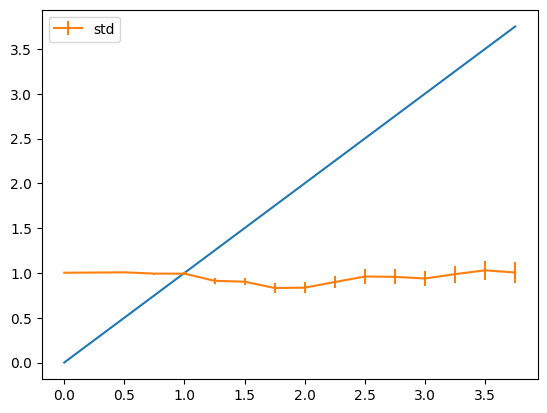

In [11]:
import matplotlib.pyplot as plt
decay_fit_t = np.array(decay_fit).transpose()[0]
decay_fit_t_mean = [np.mean(decay_fit_t[i]) for i in range(len(Decay))]
decay_fit_t_std = [np.std(decay_fit_t[i]) / np.sqrt(repetitions) for i in range(len(Decay))]

# plt.plot(Decay,decay_fit_t_mean,label='fit')
plt.plot(Decay, Decay)
plt.errorbar(Decay, decay_fit_t_mean, yerr=decay_fit_t_std, label='std')
plt.legend()

In [ ]:
d = 2
w = 1

batch_det, batch_cross = Ramsey_ExperimentV3.ramsey_local_X(n, shots, fisher_delay, [d], [w], J)
Decay_fisher, W_fisher, J_fisher = estimator.one_by_one_X(batch_det, batch_cross)

x = batch_det.zi
print(x)

f_true = np.sum([np.cos(w*fisher_delay[i]) * np.exp(-d * fisher_delay[i]) - x[i] for i in range(len(fisher_delay))])
f_fit = np.sum([np.cos(W_fisher*fisher_delay[i]) * np.exp(-Decay_fisher * fisher_delay[i]) - x[i] for i in range(len(fisher_delay))])

print("norm true: ", f_true)
print("norm fit: ", f_fit)